In [6]:
import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fnmatch
import os
import h5py
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.layers import Input, Concatenate, concatenate, Dense,Embedding, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, Flatten, Dropout, ConvLSTM2D, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.models import Model, Sequential
import glob
import pickle
import sys
import argparse

In [2]:
from ctapipe.io import EventSource
from ctapipe import utils

In [3]:

filePath="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
X = tables.open_file(filePath, mode="r")
#print(X.get_node('/dl1/event/telescope/images/tel_001').read())

In [7]:
Sample_Image_tel_001 =  X.get_node('/dl1/event/telescope/images/tel_001').read()[30][3]
print(np.shape(Sample_Image_tel_001))
#print(X.get_node('/dl1/event/telescope/images/tel_002').read()[40][3])

(960,)


In [4]:
#plt.plot(Sample_Image_tel_001)
#import dl1_data_handler
#grid = Sample_Image_tel_001.reshape((31,31))
#plt.imshow(grid, cmap='viridis')
#plt.colorbar()
#plt.show()
from ctapipe.instrument.camera import CameraGeometry

from dl1_data_handler.reader import DL1DataReader
from dl1_data_handler.image_mapper import ImageMapper


In [10]:
#reader = DL1DataReader(["../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/dl1_data_handler_demo/gamma_20deg_0deg_runs100-103___cta-prod3-demo_desert-2150m-Paranal-baseline-sample_cone10.h5"])
reader = DL1DataReader(["../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/dl1_data_handler_demo/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"])


OSError: ``/mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/dl1_data_handler_demo/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5`` does not exist

In [17]:
reader = DL1DataReader(["../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"])
print(dir(reader))
print(reader.example_description)
#print("Image shape: {}".format(reader[0][0].shape))

#print("Image shape: {}".format(reader[0][0].shape))
#print(reader.get_node('/dl1/event/telescope/images/tel_001').read()[30][3])

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_append_subarray_info', '_construct_simulated_info', '_construct_unprocessed_example_description', '_get_camera_type', '_get_image', '_v_attrs', 'class_weight', 'event_info', 'files', 'mode', 'shower_primary_id_to_name', 'subarray_info']


AttributeError: 'DL1DataReader' object has no attribute 'example_description'

In [13]:

# Define the camera types and mapping methods
hex_cams = ['LSTCam', 'FlashCam', 'NectarCam', 'DigiCam', 'VERITAS',
            'MAGICCam', 'FACT', 'HESS-I', 'HESS-II']
square_cams = ['SCTCam', 'CHEC', 'ASTRICam']
camera_types = hex_cams + square_cams
hex_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
               'bilinear_interpolation', 'bicubic_interpolation', 
               'image_shifting', 'axial_addressing']
square_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
                  'bilinear_interpolation', 'bicubic_interpolation']

In [14]:
# Load the image mappers
mappers = {}
print("Initialization time (total for all telescopes):")
for method in hex_methods:
    print(method)
    mapping_method = {cam: method for cam in hex_cams}
    for cam in square_cams:
        mapping_method[cam] = method if method in square_methods else 'oversampling'
    %timeit mappers[method] = ImageMapper(mapping_method=mapping_method)

Initialization time (total for all telescopes):
oversampling


FileNotFoundError: Couldn't find any file: LSTSiPMCam.camgeom[.fits.gz, .fits, .ecsv, .ecsv.txt]

In [18]:

from dl1_data_handler.writer import DL1DataWriter, CTAMLDataDumper

ImportError: cannot import name 'DataContainer' from 'ctapipe.containers' (/home/hanneswarnhofer/miniconda3/envs/HESSML_ENV2/lib/python3.10/site-packages/ctapipe/containers.py)

In [6]:
# Author:
# Hannes Warnhofer
# 22715256
# hannes.warnhofer@fau.de

# Test if GitHub Connection works as intended
lll = 1
# import relevant (and irrelevant) packages 
import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fnmatch
import os
import h5py
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.layers import Input, Concatenate, concatenate, Dense,Embedding, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, Flatten, Dropout, ConvLSTM2D, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.models import Model, Sequential
import glob
import pickle
import sys
import argparse

# Allow for arguments to be passed to the python file, when running it. This enables to define a series of runs with different model properties, by defining this in the respective batch script.
# Example for usage: srun python /home/hpc/b129dc/b129dc26/MoDA_Project/Hannes_Warnhofer_22715256_CTA_Multiview_Analysis_Cluster.py -n "345" -e 50 -b 512 -r 0.25 -reg 0.001
# This uses all the data that starts with 3,4 or 5, runs over 50 epochs, has a batch size of 512 and a dropout rate of .25 and a regularization of 0.001
# The following installations have to be done when running a batch script on Alex:
# module load python/tensorflow-2.7.0py3.9
# pip install --user tables
# pip install --user pandas
# pip install --user pickle
# pip install --user glob
# pip install --user sys
# pip install --user argparse

parser = argparse.ArgumentParser()
parser.add_argument("-n", "--numbers", type=str)
parser.add_argument("-e", "--epochs", type=int)
parser.add_argument("-b", "--batch_size", type=int)
parser.add_argument("-r", "--rate", type=float)
parser.add_argument("-reg", "--regulization", type=float)

args = parser.parse_args()
var1 = args.numbers
num_epochs = args.epochs
batch_size = args.batch_size
rate = args.rate
reg = args.regulization
patience = 5

# Define the appendix to the file, for being able to specify some general changes in the model structure and trace back the changes when comparing the results of t´different models
fnr = "_2023-02-27_" + var1 +'_only_earlystopping'

# Create file paths from the argument that specifies which data files to include
crit = '[' + var1 + ']*.hdf5'
file_paths = [f for f in glob.glob(os.path.join(cluster_filePath, crit))]


# load in the data
####################################

# define empty arrays
squared_training = []
peak_times = []
event_labels = []

# go through the file_paths of the includes files
for i in file_paths:
    with tables.open_file(i, mode="r") as x:
        # ignore the electron events
        mask_e = x.root.event_label[:] != 2 
        event_labels_temp = x.root.event_label[:][mask_e].reshape((-1, 1))
        squared_training_temp = x.root.squared_training[:,:,:,:][mask_e]
        peak_times_temp = x.root.peak_times[:,:,:,:][mask_e]

        # append all the data to a common array
        squared_training.append(squared_training_temp)
        peak_times.append(peak_times_temp)
        event_labels.append(event_labels_temp)

squared_training = np.concatenate(squared_training, axis=0)
peak_times = np.concatenate(peak_times, axis=0)
event_labels = np.concatenate(event_labels, axis=0)

# some reshaping for the further use of the timing data in the CNN
peak_times = peak_times.reshape((*np.shape(peak_times),1))

# overview about the important data array for later usage
print(np.shape(peak_times)[0], " events with 4 images each are available \n")
print("Shape of 'event_labels': ",np.shape(event_labels))
print("Shape of 'squared_training': ",np.shape(squared_training))
print("Shape of 'peak_times': ",np.shape(peak_times),"\n")

# split into random training data (80%) and test data (20%)
train_data, test_data, train_labels, test_labels = [], [], [], []
random_selection = np.random.rand(np.shape(peak_times)[0]) <= 0.8
train_data.append(peak_times[random_selection])
test_data.append(peak_times[~random_selection])
train_labels.append(event_labels[random_selection])
test_labels.append(event_labels[~random_selection])

# free some memory space
del peak_times
del event_labels

# convert to numpy array and reshape 
train_data = np.array(train_data)
train_data = train_data.reshape(np.shape(train_data[0]))
test_data = np.array(test_data)
test_data = test_data.reshape(np.shape(test_data[0]))

train_labels = np.array(train_labels)
train_labels = train_labels.reshape(np.shape(train_labels[0]))
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(np.shape(test_labels[0]))

train_labels_multishape = np.zeros_like(train_data)
test_labels_multishape = np.zeros_like(test_data)

len_train = np.shape(train_data)[0]
len_test = np.shape(test_data)[0]

for i in range(0,len_train):
    train_labels_multishape[i,:,:,:] = train_labels[i]

for k in range(0,len_test):
    test_labels_multishape[k,:,:,:] = test_labels[k]

# overvew about the splitting into training and test data
print("Split into Training and Test Data")
print("Train data shape:", np.shape(train_data) , "-->",round(100*len_train/(len_train+len_test),2),"%")
print("Test data shape:", np.shape(test_data), "-->",round(100*len_test/(len_train+len_test),2), "%")
print("Train labels shape:", np.shape(train_labels))
print("Test labels shape:", np.shape(test_labels))

# split up different "telescopes" for the usage in the seperate single view CNNs (probably in the most long-winded way possible, but lets just ignore that)
train_data_1 = train_data[:,0,:,:] 
train_data_2 = train_data[:,1,:,:] 
train_data_3 = train_data[:,2,:,:] 
train_data_4 = train_data[:,3,:,:] 

test_data_1 = test_data[:,0,:,:]
test_data_2 = test_data[:,1,:,:]
test_data_3 = test_data[:,2,:,:]
test_data_4 = test_data[:,3,:,:]

train_labels_1 = train_labels_multishape[:,0,:,:]
train_labels_2 = train_labels_multishape[:,1,:,:]
train_labels_3 = train_labels_multishape[:,2,:,:]
train_labels_4 = train_labels_multishape[:,3,:,:]

test_labels_1 = test_labels_multishape[:,0,:,:]
test_labels_2 = test_labels_multishape[:,1,:,:]
test_labels_3 = test_labels_multishape[:,2,:,:]
test_labels_4 = test_labels_multishape[:,3,:,:]

print("Train data 1 shape:", np.shape(train_data_1))
print("Train labels 1 shape:", np.shape(train_labels_1))

print("Test data 1 shape:", np.shape(test_data_1))
print("Test labels 1 shape:", np.shape(test_labels_1))

input_shape = (48, 48, 1)
pool_size = 2
kernel_size = 4

# Define the model for the single-view CNNs
def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(filters=25, kernel_size=kernel_size, activation='relu', padding='same',kernel_regularizer=regularizers.l2(reg), input_shape=input_shape,))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    model.add(Dropout(rate))
    model.add(Conv2D(filters=50, kernel_size=kernel_size, activation='relu', padding='same', kernel_regularizer=regularizers.l2(reg)))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    model.add(Dropout(rate))
    model.add(Conv2D(filters=50, kernel_size=kernel_size, activation='relu', padding='same',kernel_regularizer=regularizers.l2(reg)))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    model.add(Dropout(rate))
    model.add(Conv2D(filters=100, kernel_size=kernel_size, activation='relu', padding='same',kernel_regularizer=regularizers.l2(reg)))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    return model

# Define the model for the combination of the previous CNNs and the final CNN for classification

def run_multiview_model(models,inputs):

    merged = concatenate(models)

    Dropout1 = Dropout(rate)(merged)
    Conv_merged1 = Conv2D(filters=25,kernel_size=[2,2],activation='relu',padding='same',input_shape=(48,48,1))(Dropout1)
    MaxPool_merged1 = MaxPooling2D(pool_size=2,padding='same')(Conv_merged1)

    Dropout2 = Dropout(rate)(MaxPool_merged1)
    Conv_merged2 = Conv2D(filters=50,kernel_size=[2,2],activation='relu',padding='same',input_shape=(48,48,1))(Dropout2)
    MaxPool_merged2 = MaxPooling2D(pool_size=2,padding='same')(Conv_merged2)

    Dropout3 = Dropout(rate)(MaxPool_merged2)
    Conv_merged3 = Conv2D(filters=100,kernel_size=[2,2],activation='relu',padding='same',input_shape=(48,48,1))(Dropout3)
    MaxPool_merged3 = MaxPooling2D(pool_size=2,padding='same')(Conv_merged3)

    Flat_merged1 = Flatten()(MaxPool_merged3)
    Dropout4 = Dropout(rate)(Flat_merged1)
    dense_layer_merged1 = Dense(units=100, activation='relu')(Dropout4)

    Dropout5 = Dropout(rate)(dense_layer_merged1)
    dense_layer_merged2 = Dense(units=50, activation='relu')(Dropout5)

    Dropout6 = Dropout(rate)(dense_layer_merged2)
    dense_layer_merged3 = Dense(units=1, activation='sigmoid')(Dropout6)

    model = Model(inputs=inputs, outputs=dense_layer_merged3)
    return model

# Create four separate CNN models
input_1 = Input(shape=input_shape)
cnn_model_1 = create_cnn_model(input_shape)(input_1)

input_2 = Input(shape=input_shape)
cnn_model_2 = create_cnn_model(input_shape)(input_2)

input_3 = Input(shape=input_shape)
cnn_model_3 = create_cnn_model(input_shape)(input_3)

input_4 = Input(shape=input_shape)
cnn_model_4 = create_cnn_model(input_shape)(input_4)

# include early_stopping here, to see how it changes compared to previous model designs
early_stopping = EarlyStopping(monitor='val_loss', patience=patience)

model_multi = run_multiview_model([cnn_model_1, cnn_model_2, cnn_model_3, cnn_model_4],[input_1, input_2, input_3, input_4])
model_multi.summary()
model_multi.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

history = model_multi.fit([train_data[:,i,:,:] for i in range(4)],train_labels,epochs=num_epochs,batch_size=batch_size,validation_data=([test_data[:,i,:,:] for i in range(4)], test_labels), callbacks=[early_stopping])

# Create the filename, which is used for saving the Accuracy and Loss plots and the history files
str_num_epochs = '{}'.format(num_epochs)
str_batch_size = '{}'.format(batch_size)
str_rate = '{}'.format(rate*100)
str_reg = '{}'.format(reg)

history_name = "history_" + str_num_epochs + "epochs" + str_batch_size + "batchsize" + str_rate + "rate" + str_reg + "reg" + fnr + ".pkl"

# Save the history files for later usage in other scripts
with open(history_name, 'wb') as file:
    pickle.dump(history.history, file)

# Create plots for quick overview
fig, ax = plt.subplots(1,2, figsize = (9,3))
ax[0].plot(history.history['accuracy'], label='Testing Data',lw=2,c="darkorange")
ax[0].plot(history.history['val_accuracy'], label = 'Validation Data',lw=2,c="firebrick")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim([0.5, 1])
ax[0].legend(loc='lower right')

ax[1].plot(history.history['loss'],lw=2,c="darkorange")
ax[1].plot(history.history['val_loss'],lw=2,c="firebrick")
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')

print("Image created")

filename_savefig = "Test_Cluster_"+ str_num_epochs + "epochs" + str_batch_size + "batchsize" + str_rate + "rate" + fnr +".png"
fig.savefig(filename_savefig, bbox_inches='tight')

print("Image saved")

 

usage: ipykernel_launcher.py [-h] [-n NUMBERS] [-e EPOCHS] [-b BATCH_SIZE]
                             [-r RATE] [-reg REGULIZATION]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9027 --control=9025 --hb=9024 --Session.signature_scheme="hmac-sha256" --Session.key=b"a10f8126-f77a-4153-9488-6fdf85c05b9f" --shell=9026 --transport="tcp" --iopub=9028 --f=/home/hanneswarnhofer/.local/share/jupyter/runtime/kernel-v2-16483zh33QPgee3h5.json


SystemExit: 2

/home/hanneswarnhofer/anaconda3/envs/HESSML_ENV/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
# Processing HESS data for usage in CNN code from MoDA project
# Author: Hannes Warnhofer
# hannes.warnhofer@fau.de

import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import fnmatch
import os
import h5py
import glob
import pickle
import sys
import argparse

from ctapipe.io import EventSource
from ctapipe import utils
from ctapipe.instrument.camera import CameraGeometry

from dl1_data_handler.reader import DL1DataReader
from dl1_data_handler.image_mapper import ImageMapper

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.layers import Input, Concatenate, concatenate, Dense,Embedding, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, Flatten, Dropout, ConvLSTM2D, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.models import Model, Sequential


# Filepath for gamma events:
# On my local PC from WSL:
filePath_gamma="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
# On Alex from my Alex directory:
#filePath_gamma = "../../../../wecapstor1/caph/mppi111h/old_dataset/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"

data_g = tables.open_file(filePath_gamma, mode="r")
print("Successfully opened gamma data!")
#print(data_g)

# Assigning telescope data to different arrays
tel1g_raw = data_g.get_node('/dl1/event/telescope/images/tel_001').read()
tel2g_raw = data_g.get_node('/dl1/event/telescope/images/tel_002').read()
tel3g_raw = data_g.get_node('/dl1/event/telescope/images/tel_003').read()
tel4g_raw = data_g.get_node('/dl1/event/telescope/images/tel_004').read()

# Reshaping arrays and extracting the data
tel1g = np.stack([data[-1] for data in tel1g_raw])
tel2g = np.stack([data[-1] for data in tel2g_raw])
tel3g = np.stack([data[-1] for data in tel3g_raw])
tel4g = np.stack([data[-1] for data in tel4g_raw])

# Assigning label 1 to the gamma events
labelsg = np.stack([data[2] for data in tel1g_raw])
labelsg_ones = np.ones_like(labelsg)

# Free memory space
del tel1g_raw
del tel2g_raw
del tel3g_raw
del tel4g_raw
data_g.close()

# Filepath for proton events:
# On my local PC from WSL:
filePath_proton="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_proton_hybrid_preselect_20deg_0deg.h5"
# On Alex from my Alex directory:
#filePath_proton = "../../../../wecapstor1/caph/mppi111h/old_dataset/phase2d3_timeinfo_proton_hybrid_preselect_20deg_0deg.h5"

data_p = tables.open_file(filePath_proton, mode="r")
print("Successfully opened proton data!")
#print(data_p)

# Assigning telescope data to different arrays
tel1p_raw = data_p.get_node('/dl1/event/telescope/images/tel_001').read()
tel2p_raw = data_p.get_node('/dl1/event/telescope/images/tel_002').read()
tel3p_raw = data_p.get_node('/dl1/event/telescope/images/tel_003').read()
tel4p_raw = data_p.get_node('/dl1/event/telescope/images/tel_004').read()

# Reshaping arrays and extracting the data
tel1p = np.stack([data[-1] for data in tel1p_raw])
tel2p = np.stack([data[-1] for data in tel2p_raw])
tel3p = np.stack([data[-1] for data in tel3p_raw])
tel4p = np.stack([data[-1] for data in tel4p_raw])

# Assigning label 0 to the proton events
labelsp = np.stack([data[2] for data in tel1p_raw])
labelsp_zeros = np.zeros_like(labelsp)

# Free memory space
del tel1p_raw
del tel2p_raw
del tel3p_raw
del tel4p_raw
data_p.close()

# Concatenating gamma and proton events
tel1 = np.concatenate((tel1g,tel1p),axis=0)
tel2 = np.concatenate((tel2g,tel2p),axis=0)
tel3 = np.concatenate((tel3g,tel3p),axis=0)
tel4 = np.concatenate((tel4g,tel4p),axis=0)
labels = np.concatenate((labelsg_ones,labelsp_zeros),axis=0)

# Free memory space
tel1p
tel1g
tel2p
tel2g
del tel3p
del tel3g
del tel4p
del tel4g
del labelsp
del labelsg
del labelsp_zeros
del labelsg_ones

# Overview about the present data
print(np.shape(tel1))
print(np.shape(tel2))
print(np.shape(tel3))
print(np.shape(tel4))
print(np.shape(labels))
print(labels)

# Image Mapping
# Define the camera types and mapping methods: HESS-I only
hex_cams = ['HESS-I']
camera_types = hex_cams 
#hex_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
#               'bilinear_interpolation', 'bicubic_interpolation', 
#               'image_shifting', 'axial_addressing']
hex_methods = ['axial_addressing']
#Load the image mappers
mappers = {}
print("Initialization time (total for all telescopes):")
for method in hex_methods:
    print(method)
    mapping_method = {cam: method for cam in hex_cams}
    mappers[method] = ImageMapper(mapping_method=mapping_method,camera_types=["HESS-I"])

# Reshape arrays for mapping
# Defining how many events should be mapped and used later on
num_events = 1000 #len(test_pixel_values) # Takes very long with many events on my PC, for testing: num_events = 10000 (len(test_pixel_values)=106319)

# Defining image shape and mapper type
default_mapper = ImageMapper(camera_types=['HESS-I'])
#padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types}, camera_types=["HESS-I"])
#image_shape = default_mapper.map_image(tel1[0], 'HESS-I').shape

# Creating empty arrays for mapped images and the associated labels
mapped_images_1 = np.empty((num_events, 72,72,1))
mapped_images_2 = np.empty((num_events, 72,72,1))
mapped_images_3 = np.empty((num_events, 72,72,1))
mapped_images_4 = np.empty((num_events, 72,72,1))
mapped_labels = np.empty(num_events)

# Using the map_image function for mapping the data from the different telescopes to the associated empty array
# Drawing radom num_events events from all the data 
length = num_events
max_value = len(tel1)
random_list = random.sample(range(max_value),length) 
image_nr = 0
for event_nr in random_list:
    test_pixel_values_1 = np.expand_dims(tel1[event_nr], axis=1)
    mapped_images_1[image_nr] = default_mapper.map_image(test_pixel_values_1, 'HESS-I')
    test_pixel_values_2 = np.expand_dims(tel2[event_nr], axis=1)
    mapped_images_2[image_nr] = default_mapper.map_image(test_pixel_values_2, 'HESS-I')
    test_pixel_values_3 = np.expand_dims(tel3[event_nr], axis=1)
    mapped_images_3[image_nr] = default_mapper.map_image(test_pixel_values_3, 'HESS-I')        
    test_pixel_values_4 = np.expand_dims(tel4[event_nr], axis=1)
    mapped_images_4[image_nr] = default_mapper.map_image(test_pixel_values_4, 'HESS-I')
    mapped_labels[image_nr] = labels[event_nr]
    image_nr=image_nr+1

# Combining the mapped images into a common data array and print an overview
mapped_images = np.array([mapped_images_1,mapped_images_2,mapped_images_3,mapped_images_4])
print(np.shape(mapped_images_1))
print(np.shape(mapped_images))

# Reshape the final array, so it is present in the same way as MoDAII data
#mapped_images = np.transpose(mapped_images, (1, 0, 2, 3, 4))
#mapped_images = np.squeeze(mapped_images, axis=-1)
#mapped_labels = mapped_labels[:,np.newaxis]

# Checking the format
print(np.shape(mapped_images))
print(np.shape(mapped_labels))



2023-06-06 16:09:53.441855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Successfully opened gamma data!
Successfully opened proton data!
(212023, 960)
(212023, 960)
(212023, 960)
(212023, 960)
(212023,)
[1 1 1 ... 0 0 0]
Initialization time (total for all telescopes):
axial_addressing
(1000, 72, 72, 1)
(4, 1000, 72, 72, 1)
(4, 1000, 72, 72, 1)
(1000,)


In [6]:
print(np.shape(mapped_images[0,0]))

(72, 72, 1)


In [34]:
print(np.shape(tel1[0]))
print(np.shape(mapped_images_1[0]))
test_pixel_values_5 = np.expand_dims(tel1[0], axis=1)
print(np.shape(test_pixel_values_5))
mapped_images_5 = default_mapper.map_image(test_pixel_values_5, 'HESS-I')
print(np.shape(mapped_images_5))
print(np.shape(mapped_images[:,0]))

(960,)
(72, 72, 1)
(960, 1)
(72, 72, 1)
(1000, 72, 72)


In [13]:
tel1 = np.concatenate((tel1g,tel1p),axis=0)
print(np.shape(tel1g))
print(np.shape(tel1p))
print(np.shape(tel2g))
print(np.shape(tel1))
print(np.shape(tel1p)+np.shape(tel1g))

(106319, 960)
(105704, 960)
(106319, 960)
(212023, 960)
(105704, 960, 106319, 960)


In [24]:
print(np.shape(tel1))
print(np.shape(tel2))
print(np.shape(test_pixel_values_1))
print(np.shape(test_pixel_values_2))
#print(np.shape(test_pixel_values))
print(np.shape(mapped_images_1[0]))
print(np.shape(tel1[0]))
print(np.shape(mapped_images))
print(np.shape(mapped_labels))

(212023, 960)
(212023, 960)
(960, 1)
(960, 1)
(72, 72, 1)
(960,)
(1000, 4, 72, 72)
(1000, 1)


In [3]:
def plot_image(image):
    image1, image2, image3, image4 = image
    fig, ax = plt.subplots(2,2)
    ax[0,0].set_aspect(1)
    ax[0,0].pcolor(image1[:,:], cmap='viridis')
    ax[0,1].set_aspect(1)
    ax[0,1].pcolor(image2[:,:], cmap='viridis')
    ax[1,0].set_aspect(1)
    ax[1,0].pcolor(image3[:,:], cmap='viridis')
    ax[1,1].set_aspect(1)
    ax[1,1].pcolor(image4[:,:], cmap='viridis') 
    plt.show()



737.0
905.0
737.0
905.0
1313.0
-960.0
1211.0
1667.0
1.0


ValueError: too many values to unpack (expected 2)

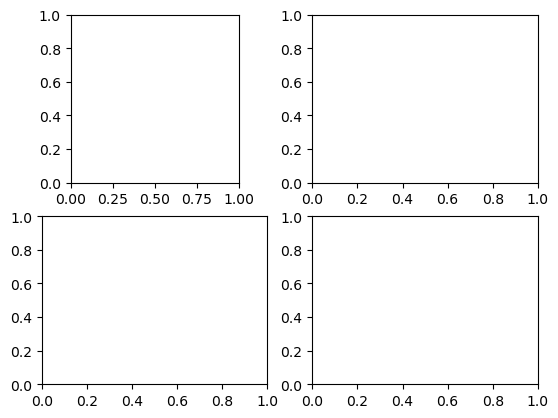

In [4]:
nr = 3

print(np.sum(tel1[0]))
print(np.sum(tel2[0]))
print(np.sum(tel1g[0]))
print(np.sum(tel2g[0]))
print(np.sum(mapped_images[0,nr]))
print(np.sum(mapped_images[1,nr]))
print(np.sum(mapped_images[2,nr]))
print(np.sum(mapped_images[3,nr]))
print(mapped_labels[nr])

plot_image((mapped_images[0,nr],mapped_images[1,nr],mapped_images[2,nr],mapped_images[3,nr]))


In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If ctapipe >= v0.8.0 is used, please install ctapipe-extra.
from ctapipe.instrument.camera import CameraGeometry

from dl1_data_handler.image_mapper import ImageMapper

In [3]:

# Define the camera types and mapping methods
hex_cams = ['HESS-I']
camera_types = hex_cams
hex_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
               'bilinear_interpolation', 'bicubic_interpolation', 
               'image_shifting', 'axial_addressing']


In [4]:

# Load the image mappers
mappers = {}
print("Initialization time (total for all telescopes):")
for method in hex_methods:
    print(method)
    mapping_method = {cam: method for cam in hex_cams}

    %timeit mappers[method] = ImageMapper(mapping_method=mapping_method,camera_types=["HESS-I"])





Initialization time (total for all telescopes):
oversampling
91.7 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
rebinning
737 ms ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
nearest_interpolation
95.7 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
bilinear_interpolation
353 ms ± 40 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
bicubic_interpolation
2.56 s ± 557 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
image_shifting
37.2 ms ± 2.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
axial_addressing
61.6 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
print("Initialization time for individual telescopes (oversampling):")
for cam in camera_types:
    print(cam)
    %timeit ImageMapper(camera_types=[cam])

Initialization time for individual telescopes (oversampling):
HESS-I
96.7 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
def plot_image(image):
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()

HESS-I: Default


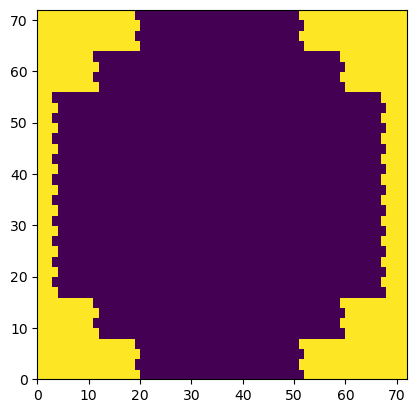

HESS-I: Default


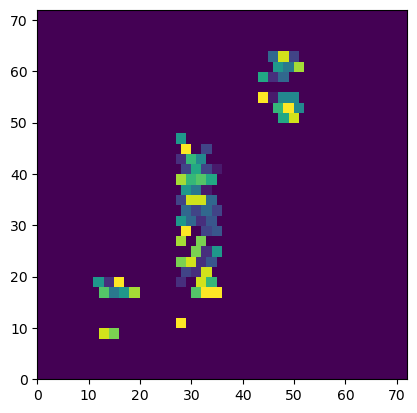

In [25]:
# Generate test pixel values (value is the pixel number)

test_pixel_values = tel1[4]
for cam in camera_types:
    num_pixels = len(CameraGeometry.from_name(cam).pix_id)
    test_pixel_values = np.expand_dims(test_pixel_values, axis=1)

# Plot mapped images with and without padding
default_mapper = ImageMapper(camera_types=['HESS-I'])
#padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types})

padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types}, camera_types=["HESS-I"])
#image_shape = default_mapper.map_image(test_pixel_values_1[0], 'HESS-I').shape

for cam in camera_types:
    print('{}: Default'.format(cam))
    image = default_mapper.map_image(test_pixel_values, cam)
    plot_image(image)


test_pixel_values = tel2[4]
for cam in camera_types:
    num_pixels = len(CameraGeometry.from_name(cam).pix_id)
    test_pixel_values = np.expand_dims(test_pixel_values, axis=1)

# Plot mapped images with and without padding
default_mapper = ImageMapper(camera_types=['HESS-I'])
#padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types})

padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types}, camera_types=["HESS-I"])
#image_shape = default_mapper.map_image(test_pixel_values_1[0], 'HESS-I').shape

for cam in camera_types:
    print('{}: Default'.format(cam))
    image = default_mapper.map_image(test_pixel_values, cam)
    plot_image(image)
